## Introducción


En este trabajo se presenta un análisis exhaustivo de los datos de una empresa con el objetivo de obtener información valiosa sobre el comportamiento de sus clientes y la rentabilidad del negocio.

Específicamente, se busca responder a las siguientes interrogantes:

* Patrones de compra: ¿En qué momento del ciclo de vida del cliente se inician las compras? ¿Qué factores influyen en la decisión de compra?
* Comportamiento del usuario: ¿Cómo utilizan los clientes los diferentes servicios ofrecidos? ¿Cuáles son las características más valoradas?
* Valor del cliente: ¿Cuánto dinero aporta cada cliente a la empresa a lo largo de su relación? ¿Cómo se puede segmentar a los clientes en función de su valor?
* Eficiencia de adquisición: ¿Cuánto tiempo tarda la empresa en recuperar los costos de adquisición de un nuevo cliente? ¿Qué estrategias podrían optimizar este proceso?

## Objetivos del proyecto

Evaluar la rentabilidad de los clientes y comprender su comportamiento en la plataforma de compras a través de un análisis exhaustivo de los datos proporcionados.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Sección 1: Importación de librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme()

## Sección 2: Carga de datos

In [ ]:
visits = pd.read_csv("/content/drive/MyDrive/[01] Colab Notebooks/[01] Triple ten/[08] Sprint_8/visits_log_us.csv")
costs = pd.read_csv("/content/drive/MyDrive/[01] Colab Notebooks/[01] Triple ten/[08] Sprint_8/costs_us.csv")
orders = pd.read_csv("/content/drive/MyDrive/[01] Colab Notebooks/[01] Triple ten/[08] Sprint_8/orders_log_us.csv")

### 2.1 Verificación de datos en los dataframes

#### 2.1.1 Modificación del tipo de datos en dataframe visitis

In [ ]:
# Verficación de tipo de datos y uso de memoria

visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [ ]:
# Cambio de nombres de las columnas

new_names = []

for name in visits.columns:
    n_names = name.strip().lower().replace(' ','_')
    new_names.append(n_names)

visits.columns = new_names

print(visits.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')


In [ ]:
# Corrección de tipo de datos

visits['device'] = visits['device'].astype('category')
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
print(visits.info(memory_usage='deep'))
print()
print(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
None

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740

#### 2.1.2 Modificación del tipo de datos en dataframe costs

In [ ]:
# Verificación del tipo de datos del dataframe costs

print(costs.info(memory_usage='deep'))
print()
print(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB
None

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


In [ ]:
# Modificación del tipo datos de la columna 'source_id' y 'dt'

costs['source_id'] = costs['source_id'].astype('category')
costs['dt'] = pd.to_datetime(costs['dt'])

print(costs.info(memory_usage = 'deep'))
print()
print(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   category      
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 42.7 KB
None

  source_id         dt  costs
0         1 2017-06-01  75.20
1         1 2017-06-02  62.25
2         1 2017-06-03  36.53
3         1 2017-06-04  55.00
4         1 2017-06-05  57.08


#### 2.1.3 Modificación del tipo de datos en dataframe orders

In [ ]:
# Verificación del tipo de datos y uso de memoria

print(orders.info(memory_usage='deep'))
print()
print(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB
None

                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


In [ ]:
# Cambio en los nombres de las columnas

new_names = []

for name in orders.columns:
    n_names = name.strip().lower().replace(' ','_')
    new_names.append(n_names)

orders.columns = new_names

print(orders.columns)

Index(['buy_ts', 'revenue', 'uid'], dtype='object')


In [ ]:
# Cambio de formato de la columna buy_ts

orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

print(orders.info(memory_usage = 'deep'))
print()
print(orders.head())
print()
print(orders['revenue'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None

               buy_ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64


## Conclusiones de la sección 2


En esta sección se optimizaron significativamente los dataframes "visits", "costs" y "orders" para mejorar su eficiencia en análisis y procesamiento. Se lograron reducciones considerables en el tamaño de los archivos sin comprometer la integridad de los datos.

Detalles de las mejoras:
* Dataframe "visits"
  se redujo el tamaño de 79.3 MB a 11.3 MB.
  Se estandarizaron los nombres de las columnas a formato "snake_case" para mejorar la legibilidad y consistencia.
  Se convirtieron las columnas "device" a categoría y "start_ts" y "end_ts" a formato de tiempo para facilitar el análisis.

* Dataframe "costs"
  se redujo el tamaño de 206.2 KB a 42.7 KB.
  Se optimizaron los tipos de datos de las columnas "source_id" y "dt" para un uso más eficiente de la memoria.

* Dataframe "orders":
   se redujo el tamaño de 4.4 MB a 1.2 MB.
   Se estandarizaron los nombres de las columnas a formato "snake_case" para mejorar la legibilidad y consistencia.
   Se convirtió la columna "buy_ts" a formato de tiempo para facilitar el análisis.

Beneficios de las optimizaciones:

* Uniformidad y legibilidad: El formato "snake_case" para los nombres de las columnas mejora la consistencia y     facilita la identificación de las mismas en el código y análisis.
* Eficiencia en el procesamiento: La reducción en el tamaño de los archivos permite un procesamiento más rápido y un uso más eficiente de la memoria, especialmente al trabajar con grandes conjuntos de datos.
* Análisis más ágiles: Los formatos de datos adecuados para las columnas facilitan el análisis y la extracción de información relevante.

## Sección 3: Visitas

### 3.1 Calculo de uso por día, semana y mes

In [ ]:
# Primera visita
first_visit_date_user = visits.groupby('uid')['start_ts'].min()
first_visit_date_user.name ='first_visit_date'
visits_ = visits.merge(first_visit_date_user, on = 'uid')

In [ ]:
# Creación de columnas con datos de año, mes y fecha

visits_['session_year'] = visits_['start_ts'].dt.to_period("Y").dt.start_time
visits_['session_month'] = visits_['start_ts'].dt.to_period("M").dt.start_time
visits_['session_date'] = visits_['start_ts'].dt.date
visits_['session_week'] = visits_['start_ts'].dt.to_period("W").dt.start_time
#visits_['session_week'] = pd.to_datetime(visits_['start_ts'] + '-1', format='%Y-%W-%w')


In [ ]:
# Cálculo del número de visitas por diferente periodo de tiempo

visits_dau = visits_.groupby('session_date').agg({'uid':'nunique'}).mean()
visits_mau = visits_.groupby(['session_year','session_month']).agg({'uid':'nunique'}).mean()
visits_wau = visits_.groupby(['session_year','session_week']).agg({'uid':'nunique'}).mean()

print('Promedio de visitas diarias: {}'.format(visits_dau.round(decimals = 2)))
print('Promedio de visitas semanales: {}'.format(visits_wau.round(decimals = 2)))
print('Promedio de visitas mensuales: {}'.format(visits_mau.round(decimals = 2)))

Promedio de visitas diarias: uid    907.99
dtype: float64
Promedio de visitas semanales: uid    5716.25
dtype: float64
Promedio de visitas mensuales: uid    23228.42
dtype: float64


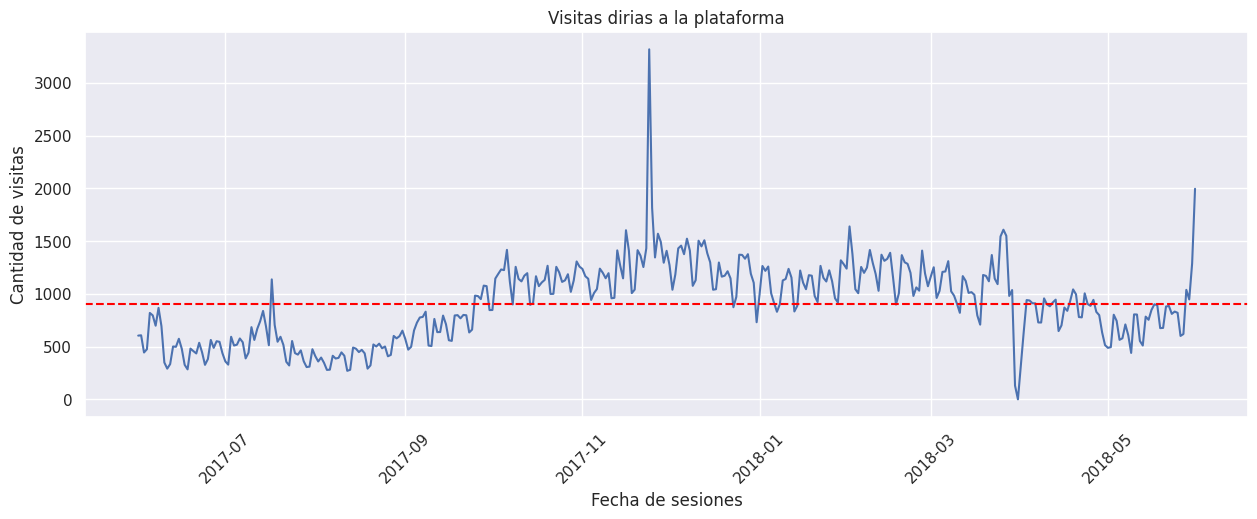

               uid
count   364.000000
mean    907.991758
std     370.513838
min       1.000000
25%     594.000000
50%     921.000000
75%    1173.000000
max    3319.000000


In [ ]:
# Gráfico de cantidad de sesiones diarias
daily_visits = visits_.groupby('session_date').agg({'uid':'nunique'}).reset_index()
daily_mean = daily_visits['uid'].mean()


daily_visits.plot(kind='line', x ='session_date', y ='uid', figsize=(15,5), legend= False)
plt.axhline(y=daily_mean, color='red', linestyle='--')
plt.title('Visitas dirias a la plataforma')
plt.xlabel('Fecha de sesiones')
plt.ylabel('Cantidad de visitas')
plt.xticks(rotation=45)
plt.show()
print(daily_visits.describe())

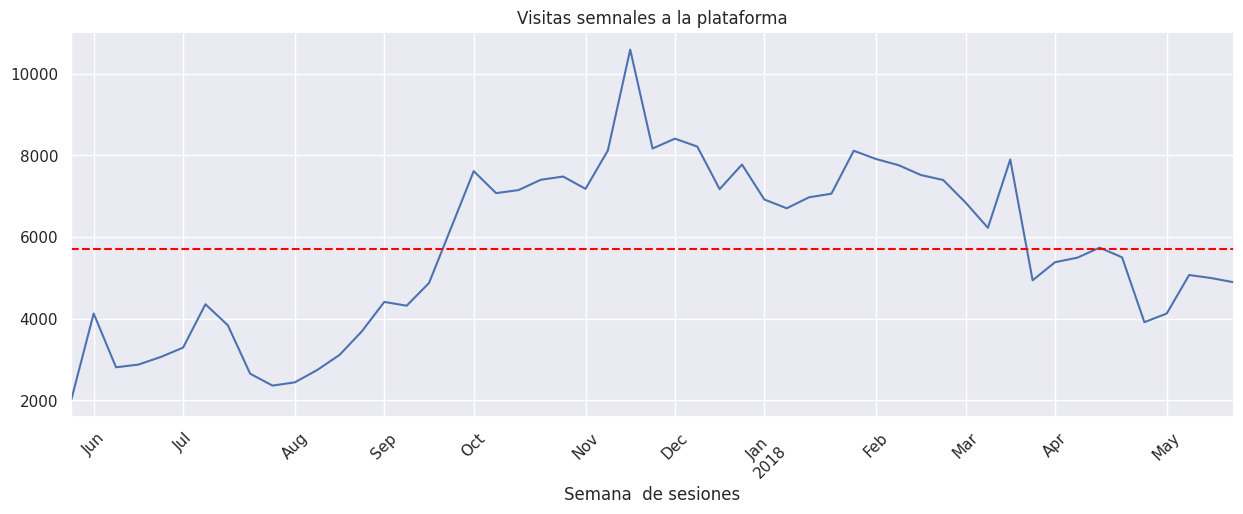

count       53.000000
mean      5716.245283
std       2049.898027
min       2021.000000
25%       4128.000000
50%       5740.000000
75%       7401.000000
max      10586.000000
Name: uid, dtype: float64


In [ ]:
# Gráfico de cantidad de sesiones semanalas

week_visits = visits_.groupby('session_week').agg({'uid':'nunique'}).reset_index()
week_mean = week_visits['uid'].mean()

week_visits.plot(kind='line', x ='session_week', y ='uid', figsize=(15,5), legend= False)
plt.axhline(y=week_mean, color='red', linestyle='--')
plt.title('Visitas semnales a la plataforma')
plt.xlabel('Semana  de sesiones')
plt.xticks(rotation=45)
plt.show()
print(week_visits['uid'].describe())

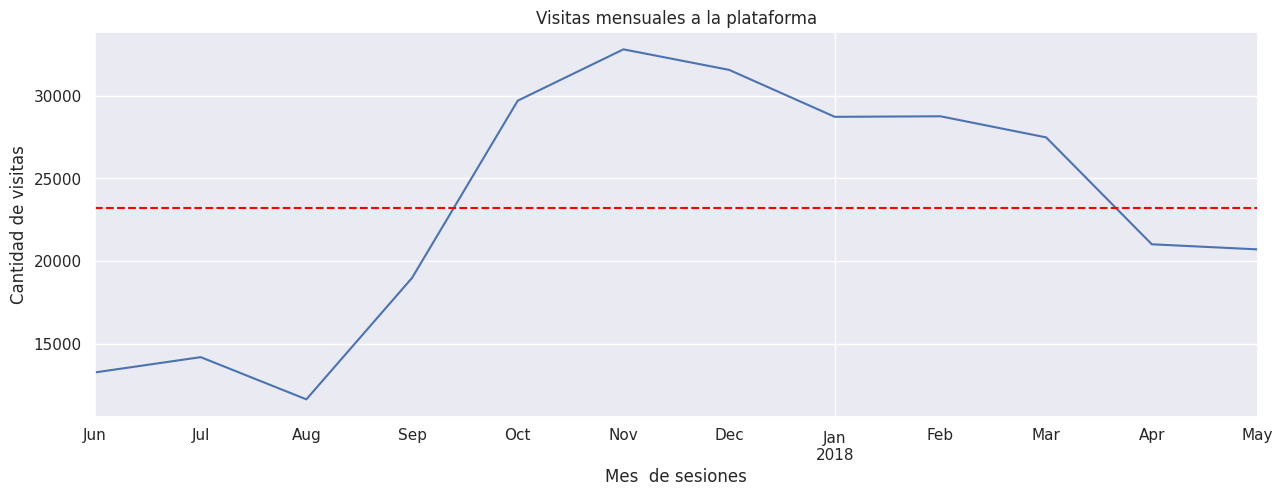

count       12.000000
mean     23228.416667
std       7546.380462
min      11631.000000
25%      17777.000000
50%      24240.500000
75%      28984.750000
max      32797.000000
Name: uid, dtype: float64


In [ ]:
# Gráfico de visitas por mes
month_visits = visits_.groupby('session_month').agg({'uid':'nunique'}).reset_index()
month_mean= month_visits['uid'].mean()

month_visits.plot(kind='line', x ='session_month', y ='uid', figsize=(15,5), legend= False)
plt.axhline(y=month_mean, color='red', linestyle='--')
plt.title('Visitas mensuales a la plataforma')
plt.xlabel('Mes  de sesiones')
plt.ylabel('Cantidad de visitas')

plt.show()
print(month_visits['uid'].describe())

### Conclusiones de la sección
Se econtró que el promedio diario de visitas fue 907, mientras que el mensual de 23228. Se observó un pico significativo de visitas durante los meses de noviembre y diciembre, coincidiendo con la temporada de compras navideñas y las estrategias de marketing asociadas (ofertas, promociones, etc.), mientras que agosto se observó como el mes con menores visitas del año.

El aumento de las visitas en los meses de noviembre y diciembre puede asociarse a diversos factores:

* Compras navideñas: La búsqueda de regalos y productos para estas festividades impulsa el tráfico hacia el sitio web.
* Ofertas y promociones: Las empresas implementan estrategias de marketing agresivas durante este periodo, atrayendo a los consumidores con descuentos y ofertas especiales.
* Mayor disponibilidad de ingresos: En muchos países, diciembre y noviembre coinciden con el pago de aguinaldos o bonificaciones, lo que incrementa el poder adquisitivo de los consumidores.

La disminución de visitas en el mes de agosto se puede deber a los siguientes factores:
* Vacaciones: En muchos países, agosto es un mes de vacaciones escolares y laborales, lo que reduce el tiempo disponible para realizar compras en línea.
* Prioridades: Durante este periodo, las personas suelen enfocarse en actividades de ocio y viajes, destinando menos tiempo a las compras en línea.
* Estacionalidad de productos: La demanda de ciertos productos puede ser menor durante el verano, lo que se refleja en una reducción del tráfico hacia el sitio web.

Se recomienda realizar un análisis más profundo de la estacionalidad del tráfico, considerando factores como la ubicación geográfica del público objetivo, el tipo de productos ofrecidos y las estrategias de marketing implementadas a lo largo del año.

### 3.2 Duración de cada sesión

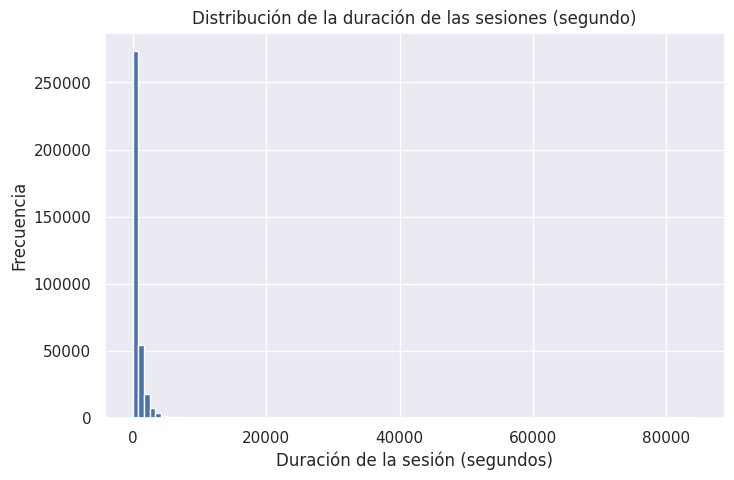

In [ ]:
# Cálculo de la duración media de sesión en segundos

visits_['duration_sessions_sec'] = (visits_['end_ts'] - visits_['start_ts']).dt.seconds

plt.figure(figsize=(8,5))
visits_['duration_sessions_sec'].plot(kind='hist', bins = 100)
plt.title('Distribución de la duración de las sesiones (segundo)')
plt.ylabel('Frecuencia')
plt.xlabel('Duración de la sesión (segundos)')

plt.show()

In [ ]:
# Descriptivos de los datos en la columna 'duration_sessions_sec'
visits_['duration_sessions_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duration_sessions_sec, dtype: float64

In [ ]:
# Moda de la duración de las sesiones (segundos)

print(visits_['duration_sessions_sec'].mode())

0    60
Name: duration_sessions_sec, dtype: int32


### 3.3 Frecuencia de retorno de usuarios

In [ ]:
# Cálculo del factor de adherencia expresado como porcentaje


sf_week = (visits_dau / visits_wau) * 100
sf_month = (visits_dau / visits_mau) *100

print('Factor de adherencia semanal = {} %'.format(sf_week.round(decimals = 2)))
print('Factor de adherencia mensual = {} %'.format(sf_month.round(decimals = 2)))

Factor de adherencia semanal = uid    15.88
dtype: float64 %
Factor de adherencia mensual = uid    3.91
dtype: float64 %


## Conclusiones de la sección 3


* Visitas: Se observó un flujo constante de visitas, con un promedio diario de 907.99, lo que indica una actividad considerable en la plataforma. El promedio semanal (5,612.39) y mensual (23,228.42) confirma este patrón de uso regular.

* Duración de las sesiones: El análisis de la distribución de la duración de las sesiones reveló que no es normal, lo que sugiere que la mayoría de las sesiones se concentran en un rango específico de tiempo. La moda de la distribución, 60 segundos, se establece como un valor medio representativo de la duración típica de una sesión.

* Adherencia: Los indicadores de adherencia semanal (16.18%) y mensual (3.91%) revelan que una proporción significativa de usuarios regresa a la plataforma con cierta frecuencia. La adherencia semanal más alta sugiere un mayor compromiso a corto plazo, mientras que la adherencia mensual indica retención de usuarios a largo plazo.

## Sección 4: Ventas

### 4.1 Conversión de clientes

In [ ]:
# Creación de columna con datos de primera compra

first_order_date_users = orders.groupby('uid')['buy_ts'].min()
first_order_date_users.name = 'first_order_date'
orders_conversion = orders.join(first_order_date_users, on='uid')

In [ ]:
# Unión de dataframe de visits y orders para identificar fechas de la primera visita y fechas de la primera compra

visits_orders_users = visits_.merge(orders_conversion, on='uid')
visits_orders_users.rename(columns = {'buy_ts':'purchase_date'}, inplace = True)


In [ ]:
# Cálculo de los días que pasaron desde la primera visita hasta la primera compra.

visits_orders_users['days_to_conversion'] = (
    visits_orders_users['first_order_date']- visits_orders_users['first_visit_date']).dt.days

In [ ]:
# Cálculo de conversión de visitas a compras en varios periodos de tiempos

visits_orders_users['conversion_0days'] = visits_orders_users['days_to_conversion'] == 0
visits_orders_users['conversion_7days'] = visits_orders_users['days_to_conversion'] < 7
visits_orders_users['conversion_30days'] = visits_orders_users['days_to_conversion'] < 30
visits_orders_users['conversion_180days'] = visits_orders_users['days_to_conversion'] < 180
visits_orders_users['conversion_365days'] = visits_orders_users['days_to_conversion'] < 365

print(visits_orders_users[['conversion_0days', 'conversion_7days', 'conversion_30days', 'conversion_180days', 'conversion_365days']].mean())

conversion_0days      0.398005
conversion_7days      0.725008
conversion_30days     0.867869
conversion_180days    0.979564
conversion_365days    1.000000
dtype: float64


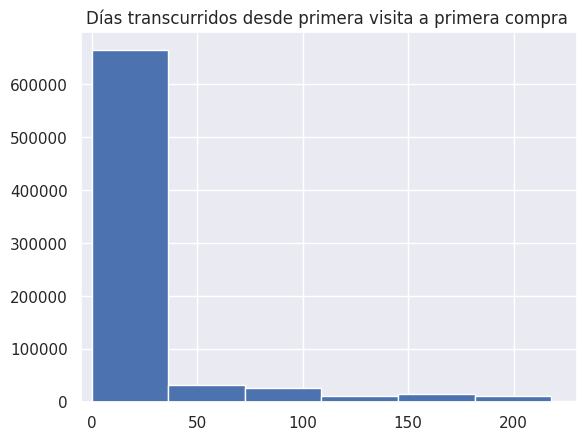

In [ ]:
# Gráfico para visualizar la distribución de tiempo de pedidos

visits_orders_users['days_to_conversion'].hist(bins=10)
plt.title('Días transcurridos desde primera visita a primera compra ')
plt.xlim(-5,230)
plt.show()

### Conclusiones de la sección

Se observa una notable capacidad para retener a los usuarios y convertirlos en clientes a largo plazo. El 97% de los usuarios que visitan el sitio web por primera vez realizan una compra en un plazo de 6 meses. La tasa de conversión inicial del 39% se multiplica por 2.46 a lo largo de los 6 meses, lo que indica un crecimiento exponencial en la probabilidad de compra.

    
Los datos demuestran un alto valor del usuario, ya que los visitantes iniciales tienen una alta probabilidad de convertirse en clientes rentables a lo largo del tiempo. Se recomienda analizar y optimizar el embudo de conversión para identificar oportunidades de mejora y aumentar aún más la tasa de conversión a largo plazo.

### 4.2 Pedidos realizados durante un periodo de tiempo

In [ ]:
first_orders = orders.groupby('uid')['buy_ts'].min()
first_orders.name = 'first_orders_month'

orders_ = orders.join(first_orders, on='uid')
orders_['first_orders_month'] = orders_['first_orders_month'].dt.to_period('M').dt.start_time
orders_['order_month'] = orders_['buy_ts'].dt.to_period('M').dt.start_time


orders_cohort = orders_.groupby(['first_orders_month', 'order_month']).agg({'uid':'count'}).reset_index()

orders_cohort.rename(columns ={'uid':'n_numbers'}, inplace = True)


orders_cohort['life_time'] = (orders_cohort['order_month'] - orders_cohort['first_orders_month'])

orders_cohort['life_time'] = orders_cohort['life_time'] / np.timedelta64(1,'M')
orders_cohort['life_time'] = orders_cohort['life_time'].round().astype('int')


order_pivot = orders_cohort.pivot_table(index='first_orders_month',
                                       columns ='life_time',
                                       values ='n_numbers',
                                       aggfunc='mean')

order_pivot.fillna(' ')

life_time,0,1,2,3,4,5,6,7,8,9,10,11
first_orders_month,,,,,,,,,,,,
2017-06-01,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0
2017-07-01,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,
2017-08-01,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,,
2017-09-01,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,,,
2017-10-01,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,,,,
2017-11-01,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,,,,,
2017-12-01,5052.0,270.0,202.0,179.0,86.0,105.0,,,,,,
2018-01-01,3783.0,224.0,159.0,64.0,78.0,,,,,,,
2018-02-01,4095.0,222.0,83.0,70.0,,,,,,,,


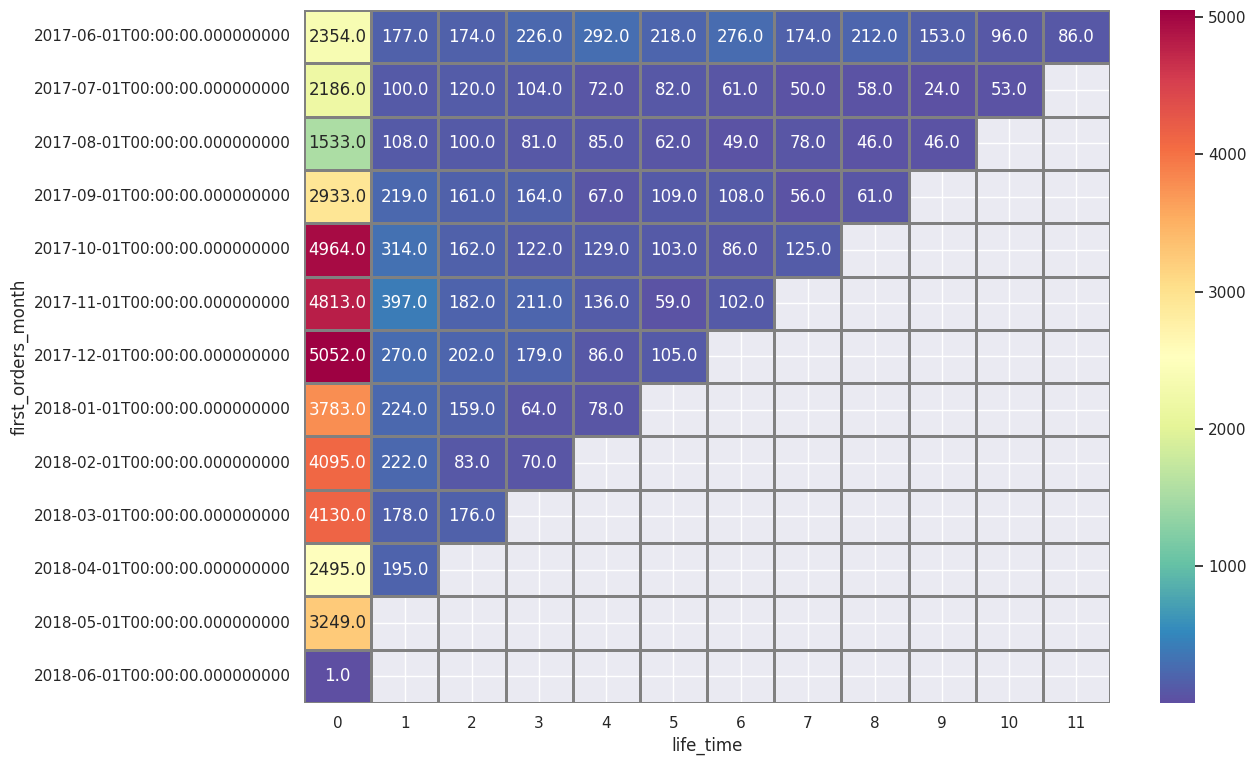

In [ ]:

plt.figure(figsize=(13,9))
sns.heatmap(order_pivot,
           annot= True,
           fmt = '.1f',
           linewidths =1,
           linecolor='gray',
           cmap = 'Spectral_r')
plt.show()

In [ ]:
# Calculo de la ltv por cohorte.

revenue_cohort = orders_.groupby(['first_orders_month', 'order_month']).agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()

revenue_cohort.rename(columns={'revenue': 'total_revenue', 'uid': 'n_buyers'}, inplace=True)

revenue_cohort['life_time'] = (revenue_cohort['order_month'] - revenue_cohort['first_orders_month'])
revenue_cohort['life_time'] = revenue_cohort['life_time'] / np.timedelta64(1, 'M')
revenue_cohort['life_time'] = revenue_cohort['life_time'].round().astype('int')

margin_rate = 0.3

revenue_cohort['gp'] = revenue_cohort['total_revenue'] * margin_rate

# Se agrega el tamaño inicial de cohorte
initial_cohort_size = orders_.groupby('first_orders_month')['uid'].nunique().reset_index()
initial_cohort_size.rename(columns={'uid': 'initial_cohort_size'}, inplace=True)

revenue_cohort = pd.merge(revenue_cohort, initial_cohort_size, on='first_orders_month')

revenue_cohort['ltv'] = revenue_cohort['gp'] / revenue_cohort['initial_cohort_size']


revenue_cohort_pivot = revenue_cohort.pivot_table(index='first_orders_month',
                                                  columns='life_time',
                                                  values='ltv',
                                                  aggfunc='sum')


revenue_cohort_pivot = revenue_cohort_pivot.cumsum(axis=1)


revenue_cohort_pivot.fillna("")

life_time,0,1,2,3,4,5,6,7,8,9,10,11
first_orders_month,,,,,,,,,,,,
2017-06-01,1.417324,1.562923,1.694214,1.980615,2.287375,2.508025,2.793157,2.967635,3.133599,3.315335,3.486713,3.56377
2017-07-01,1.803066,1.903629,2.090688,2.198381,2.251418,2.298232,2.334295,2.376841,2.425211,2.469354,2.516056,
2017-08-01,1.582955,1.724553,1.862098,1.979481,2.127696,2.212758,2.275958,2.39746,2.485123,2.541517,,
2017-09-01,1.693359,2.028635,2.184914,3.377651,3.497819,3.691939,3.902421,3.975366,4.030568,,,
2017-10-01,1.501120,1.661849,1.719267,1.76641,1.811878,1.847987,1.873432,1.908073,,,,
2017-11-01,1.546405,1.666175,1.726042,1.823527,1.867931,1.884095,1.918573,,,,,
2017-12-01,1.421457,1.499569,1.777099,2.096681,2.19056,2.291974,,,,,,
2018-01-01,1.240691,1.329118,1.420403,1.463236,1.482045,,,,,,,
2018-02-01,1.247096,1.330578,1.354133,1.376376,,,,,,,,


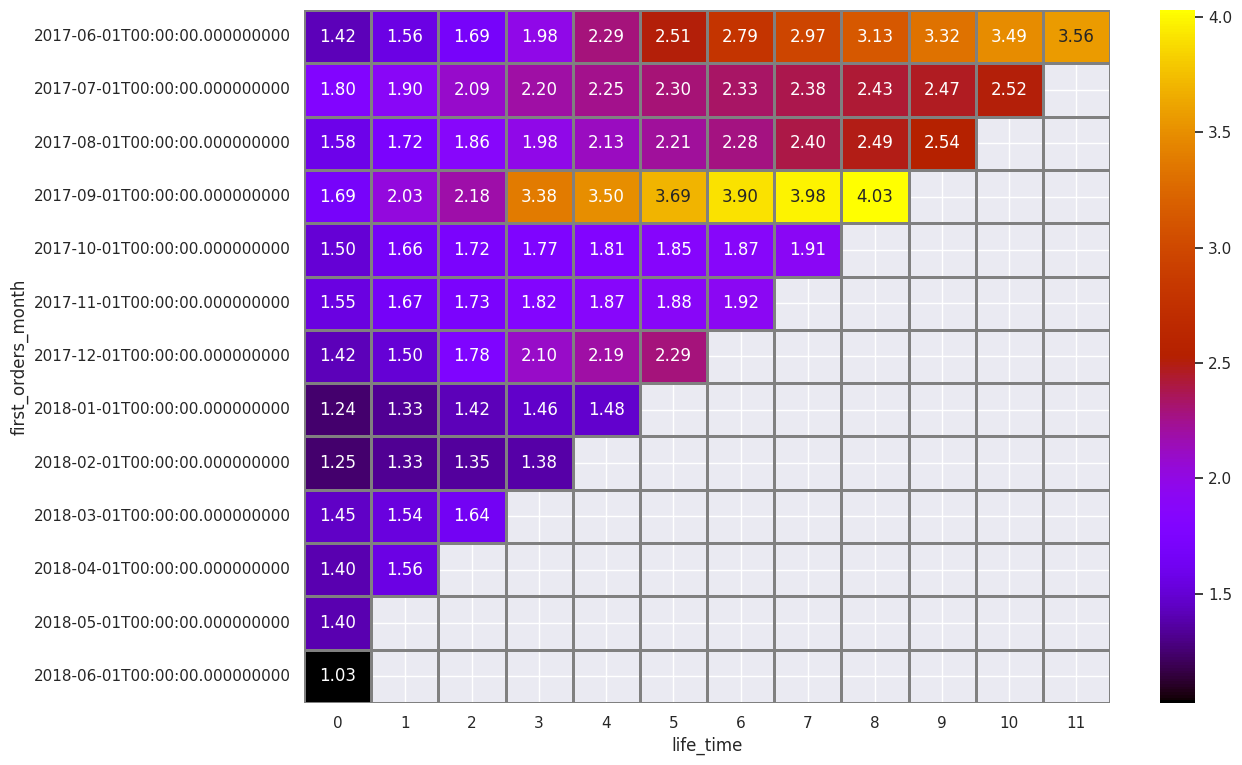

In [ ]:

plt.figure(figsize=(13,9))
sns.heatmap(revenue_cohort_pivot,
           annot= True,
           fmt = '.2f',
           linewidths =1,
           linecolor='gray',
           cmap= 'gnuplot')
plt.show()

### Conclusiones de la sección

Se observa un crecimiento inicial en el LTV para todas las cohortes de clientes durante los primeros meses. Esto sugiere que los clientes tienden a realizar más pedidos y gastar más dinero en la tienda durante sus primeros meses como clientes. Después de un período de crecimiento inicial, el LTV se estabiliza o alcanza una meseta para la mayoría de las cohortes. Esto podría indicar que los clientes han alcanzado un nivel de gasto constante o que la tasa de retención de clientes no es lo suficientemente alta para mantener un crecimiento continuo del LTV.
Se observa una ligera disminución en el LTV para algunas cohortes de clientes después de alcanzar su punto máximo. Esto podría deberse a la pérdida de clientes, la disminución del gasto o una combinación de ambos factores.


### 4.3 Tamaño de la compra promedio

In [ ]:
purchase_cohort = orders_.groupby(['first_orders_month', 'order_month']).agg({'revenue':'sum', 'uid':'nunique'}).reset_index()

purchase_cohort.rename(columns ={'revenue':'total_revenue', 'uid':'n_buyers'}, inplace= True)


purchase_cohort['life_time'] = (purchase_cohort['order_month'] - purchase_cohort['first_orders_month'])

purchase_cohort['life_time'] = purchase_cohort['life_time'] / np.timedelta64(1,'M')
purchase_cohort['life_time'] = purchase_cohort['life_time'].round().astype('int')


purchase_cohort['revenue_per_user'] = purchase_cohort['total_revenue'] / purchase_cohort['n_buyers']

purchase_cohort_pivot = purchase_cohort.pivot_table(index ='first_orders_month',
                                                 columns ='life_time',
                                                 values ='revenue_per_user',
                                                 aggfunc='mean')
purchase_cohort_pivot.fillna('')

life_time,0,1,2,3,4,5,6,7,8,9,10,11
first_orders_month,,,,,,,,,,,,
2017-06-01,4.724414,16.09541,17.7068,35.764815,23.506591,22.207761,31.011935,25.033191,19.29569,27.233556,25.681333,9.804151
2017-07-01,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,
2017-08-01,5.276518,11.148793,11.851321,12.182955,16.92125,12.139062,9.620333,12.610455,21.07,8.307419,,
2017-09-01,5.644529,22.188385,13.4452,138.669189,19.881538,26.095,27.437121,16.961351,11.044651,,,
2017-10-01,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,,,,
2017-11-01,5.154683,7.339054,6.786583,12.51066,7.457284,4.580833,7.564839,,,,,
2017-12-01,4.738191,7.816575,39.366019,48.135052,27.4314,23.518413,,,,,,
2018-01-01,4.135636,8.721228,12.365542,11.199767,4.699556,,,,,,,
2018-02-01,4.156987,8.61,4.942414,6.941026,,,,,,,,


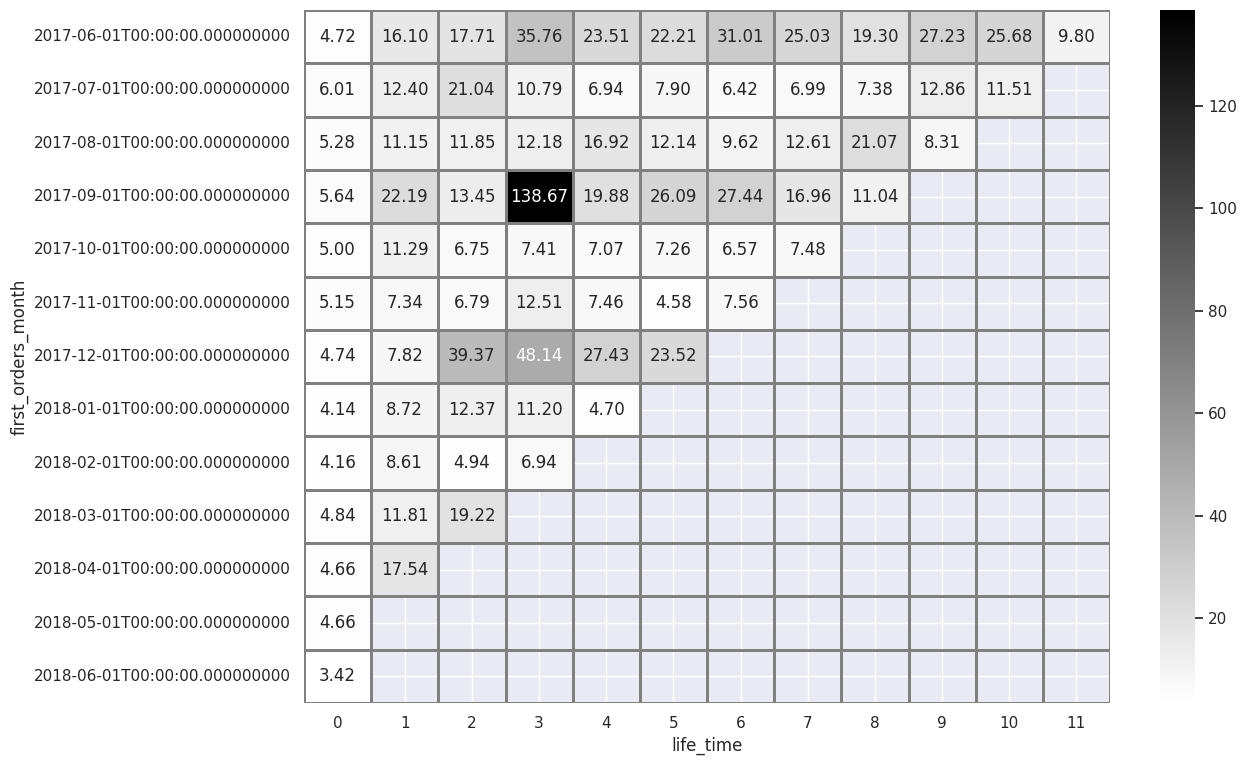

In [ ]:
plt.figure(figsize=(13,9))
sns.heatmap(purchase_cohort_pivot,
           annot= True,
           fmt = '.2f',
           linewidths =1,
           linecolor='gray',
           cmap= 'binary')
plt.show()

### Conclusiones de la sección:

Se observa un pico en el número de pedidos durante el primer mes después de que el cliente realiza su primer pedido (columna "first_orders_month"). Esto sugiere que existe un efecto de novedad, donde los clientes tienden a realizar más pedidos inmediatamente después de descubrir la tienda.En general, se observa una tendencia a la baja en el número de pedidos a medida que aume
nta la antigüedad del cliente. Esto puede deberse a varios factores, como la saturación de las necesidades del cliente, la competencia de otras tiendas o la pérdida de interés en la marca.    Se observa un ligero repunte en el número de pedidos durante los meses de noviembre y diciembre (2017 y 2018), lo que podría estar relacionado con las compras navideñas como se menciono anteriormente en la sección de visitas.

Para mejorar el análisis, se podrían segmentar los clientes de la siguiente forma:
Se podría segmentar a los clientes en función de su comportamiento de compra, por ejemplo:

* Clientes activos: Aquellos que realizan pedidos regularmente, por ejemplo, con una antigüedad de menos de 6 meses.
* Clientes inactivos: Aquellos que han dejado de realizar pedidos, por ejemplo, con una antigüedad de más de 12 meses.
* Clientes de temporada: Aquellos que solo realizan pedidos durante ciertos períodos del año, como las navidades.



## 5. Marketing

### 5.2 Costo de adquisición por fuente

In [ ]:
costs_by_source = costs.groupby('source_id', observed = True).agg({'costs':'sum'})
costs_by_source['%'] = (costs_by_source['costs']/ costs_by_source['costs'].sum())*100
costs_by_source.sort_values(by='costs', ascending= False)

,costs,%
source_id,,
3,141321.63,42.937725
4,61073.60,18.555981
5,51757.10,15.725350
2,42806.04,13.005751
1,20833.27,6.329769
10,5822.49,1.769046
9,5517.49,1.676378


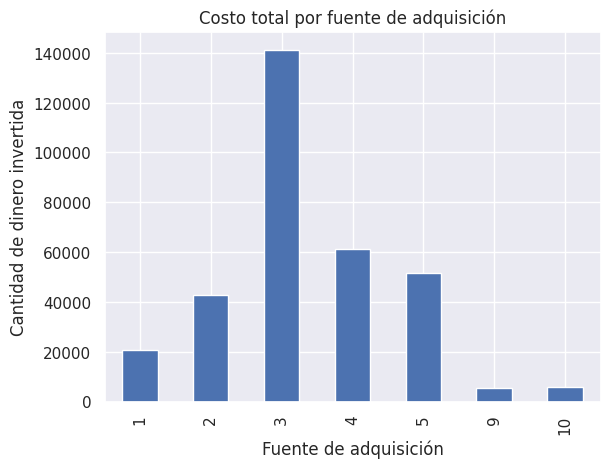

In [ ]:
costs_by_source.plot(kind='bar', y = 'costs', legend= False)
plt.title('Costo total por fuente de adquisición')
plt.xlabel('Fuente de adquisición')
plt.ylabel('Cantidad de dinero invertida')
plt.show()

### 5.1 Gasto total por fuente de adquisición a lo largo del tiempo

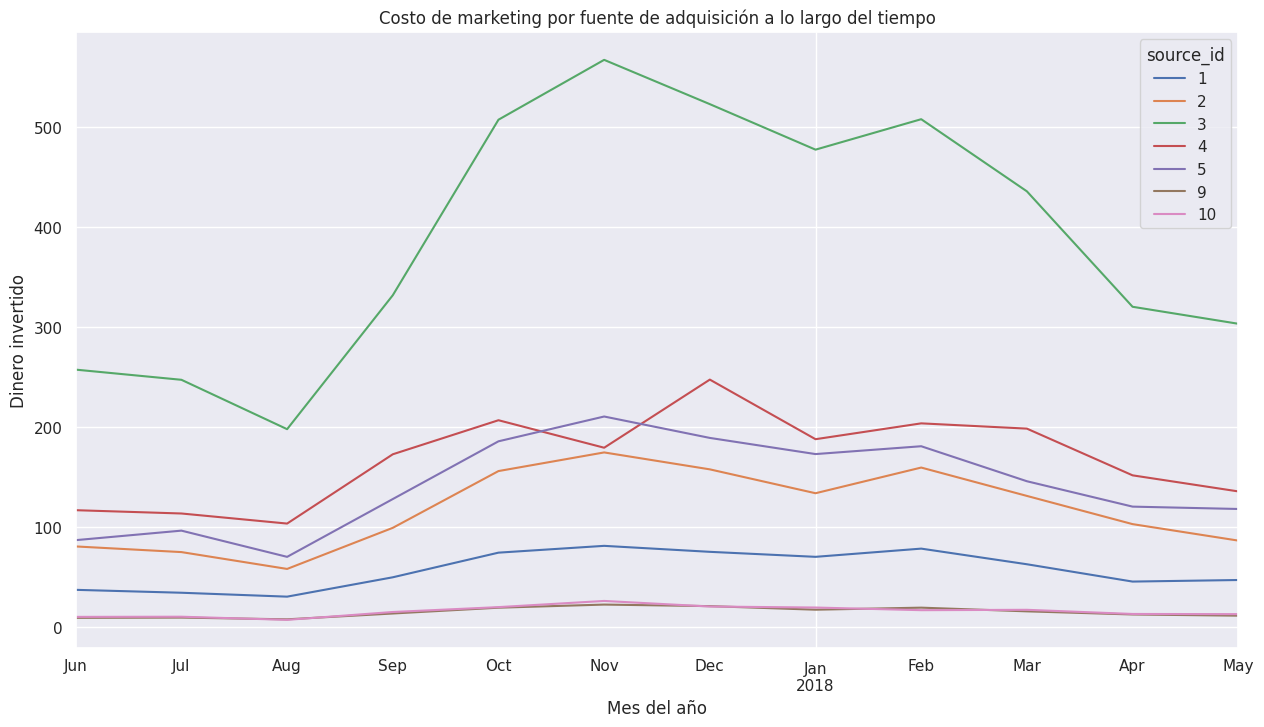

In [ ]:

# Se agrupan las fuentes y los costos usando la columna de 'dt' en formato de mes para obtener el costo por cohorte y por source_id

costs['dt'] = costs['dt'].dt.to_period('M').dt.start_time
costs['source_id'] = costs['source_id'].astype('category')

costs_pivot = costs.pivot_table (index = 'dt',
                               columns = 'source_id',
                               values = 'costs',
                               aggfunc = 'mean',
                                observed = False)



costs_pivot.plot(kind = 'line', figsize=(15,8))
plt.title('Costo de marketing por fuente de adquisición a lo largo del tiempo')
plt.xlabel('Mes del año')
plt.ylabel('Dinero invertido')
plt.show()


### Conclusión de la sección

Se identificó la fuente 3 como la más costosa para la adquisición de clientes, representando el 42.93% del total de gastos. Las fuentes 4 y 5 también mostraron costos considerables, con un 18.55% y un 15.72% del total, respectivamente. Se observó un incremento generalizado en los porcentajes de gastos de marketing en los meses de noviembre y diciembre. También se puede atribuir al incremento en la inversión en anuncios para dar a conocer productos y promociones de manera más agresiva.



## Cálculo del costo de adquisición

<ipython-input-47-e8020e1d8230>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'source_id', y='cac', data =cac_grouped,palette= 'cividis')


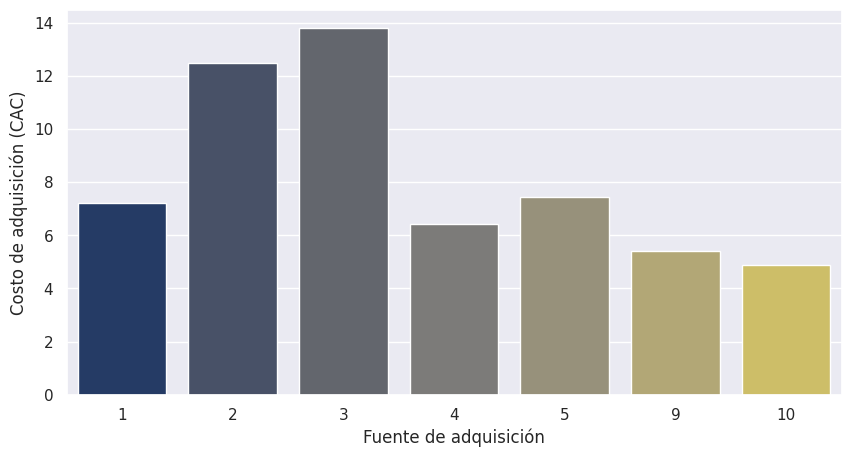

In [ ]:
# Cálculo del CAC por fuente de adquisición.


#Se toma la primera fila de cada user_id
first_visits = visits.sort_values(by='start_ts').groupby('uid').head(1)
first_orders = orders_.sort_values(by= 'buy_ts').groupby('uid').head(1)

first_visits_order = pd.merge(first_orders, first_visits[['uid','source_id']], on='uid', how='left')

new_monthly_users = first_visits_order.groupby(['order_month', 'source_id'])['uid'].nunique().reset_index()
new_monthly_users.rename(columns= {'order_month':'month','uid':'acquire_users'}, inplace= True)

costs["month"] = pd.to_datetime(costs["dt"]).dt.to_period("M").dt.start_time

monthly_costs = costs.groupby(['month','source_id'])['costs'].sum().reset_index()

cac_table = pd.merge(monthly_costs,new_monthly_users, on=['month', 'source_id'], how='left' )

cac_table['cac'] = cac_table['costs'] / cac_table['acquire_users']
cac_grouped = cac_table.groupby('source_id')['cac'].mean().sort_values().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x = 'source_id', y='cac', data =cac_grouped,palette= 'cividis')
plt.ylabel('Costo de adquisición (CAC)')
plt.xlabel('Fuente de adquisición')
plt.show()

In [ ]:
# Calculo de costos de adquisición de clientes por cohorte.

orders_cohort = (
    orders_.groupby(['first_orders_month', 'order_month'])
    .agg({'uid': 'count', 'revenue': 'sum'})
    .reset_index()
)
orders_cohort.rename(columns={'uid': 'n_buyers'}, inplace=True)


orders_cohort['age'] = (
    (orders_cohort['order_month'] - orders_cohort['first_orders_month']) / np.timedelta64(1, 'M')
).round().astype(int)

monthly_costs = (
    costs.groupby(['dt', 'source_id'])
    .agg({'costs': 'sum'})
    .reset_index()
)
monthly_costs.rename(columns={'costs': 'monthly_costs'}, inplace=True)


source_ids = [1, 2, 3, 4, 5, 9, 10]
expanded_orders_cohort = pd.concat([orders_cohort.assign(source_id=source_id) for source_id in source_ids])


revenue_costs_cohort = pd.merge(
    expanded_orders_cohort,
    monthly_costs,
    left_on=['source_id', 'first_orders_month'],
    right_on=['source_id', 'dt'],
    how='left'
)


revenue_costs_cohort['cac'] = revenue_costs_cohort['monthly_costs'] / revenue_costs_cohort['n_buyers']


revenue_costs_cohort_pivot = revenue_costs_cohort.pivot_table(index='first_orders_month',
                                                             columns = 'age',
                                                             values = 'cac',
                                                             aggfunc = 'mean')

revenue_costs_cohort_pivot.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_orders_month,,,,,,,,,,,,
2017-06-01,1.093276,14.539952,14.79064,11.387484,8.813601,11.805374,9.324534,14.79064,12.139488,16.820728,26.808036,29.925249
2017-07-01,1.192040,26.057986,21.714988,25.055755,36.191647,31.778031,42.718009,52.115971,44.927562,108.57494,49.166011,
2017-08-01,1.378300,19.564206,21.129343,26.085608,24.85805,34.079585,43.121108,27.088901,45.933354,45.933354,,
2017-09-01,1.186932,15.896223,21.622813,21.227274,51.959296,31.938283,32.234008,62.165587,57.070047,,,
2017-10-01,1.045323,16.525423,32.030758,42.532646,40.224673,50.378474,60.33701,41.511863,,,,
2017-11-01,1.125163,13.640835,29.755008,25.665457,39.819202,91.786634,53.092269,,,,,
2017-12-01,1.083456,20.272672,27.097136,30.578891,63.646761,52.129728,,,,,,
2018-01-01,1.265757,21.376607,30.115472,74.818125,61.389231,,,,,,,
2018-02-01,1.141567,21.057291,56.32191,66.781694,,,,,,,,


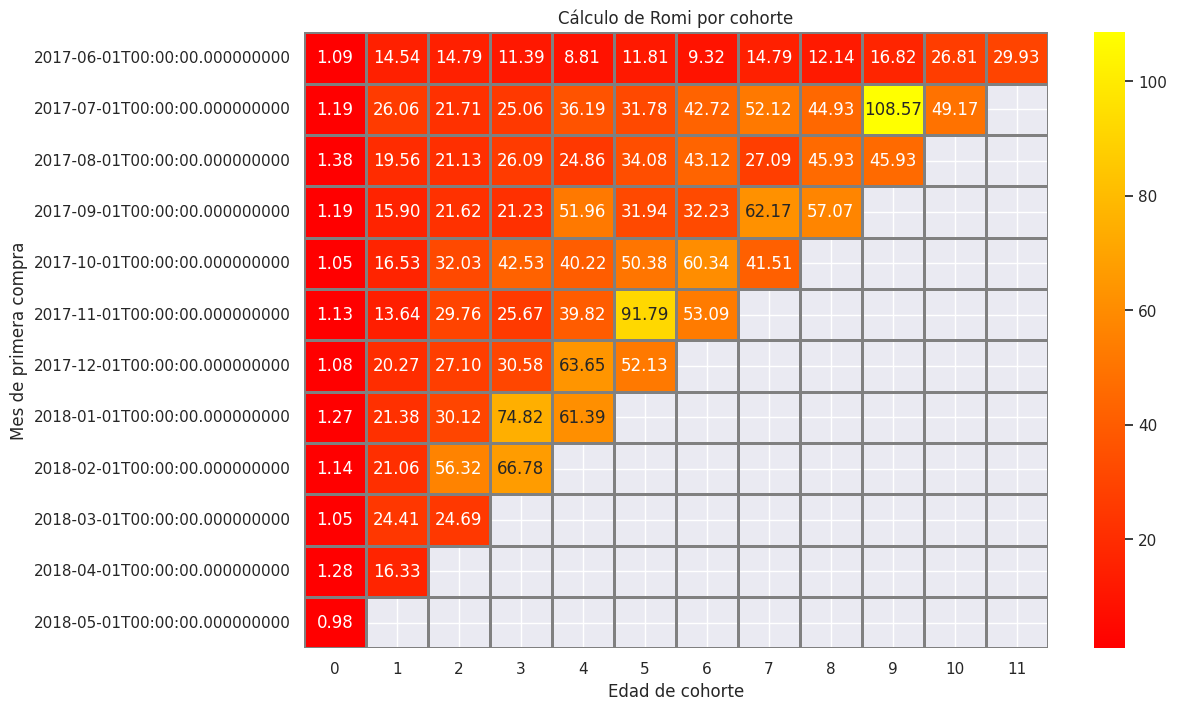

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(revenue_costs_cohort_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cmap='autumn')
plt.title('Cálculo de Romi por cohorte')
plt.ylabel('Mes de primera compra')
plt.xlabel('Edad de cohorte')
plt.show()

### 5.3 Cálculo de ROMI

In [ ]:
   # Función para graficar la ROMI por fuente de adquisición.

def generate_romi_report(source_id, orders_, costs):
    # Filtrar los costos para el source_id especificado
    costs_1 = costs[costs['source_id'] == source_id]
    orders_.rename(columns = {'first_orders_month': 'first_order_month' }, inplace = True)

    # Agrupar los ingresos mensuales por cohorte
    cohorts_revenue_month = (
        orders_
        .groupby(['first_order_month', 'order_month'])
        .agg({'revenue': 'sum'})
        .reset_index()
    )

    # Calcular la edad de las cohortes en meses
    cohorts_revenue_month['age_month'] = (
        (cohorts_revenue_month['order_month'] - cohorts_revenue_month['first_order_month'])
        / np.timedelta64(1, 'M')
    ).round().astype(int)

    # Obtener el tamaño de las cohortes
    cohort_sizes = (
        orders_
        .groupby('first_order_month')
        .agg({'uid': 'nunique'})
        .reset_index()
        .rename(columns={'uid': 'n_buyers'}, inplace=False)
    )

    # Unir los datos de tamaño de cohortes y los ingresos de cohortes
    cohorts_report = pd.merge(cohort_sizes, cohorts_revenue_month, on='first_order_month')
    cohorts_report['rev_per_buyer'] = cohorts_report['revenue'] / cohorts_report['n_buyers']


    costs['month'] = costs['dt'].dt.to_period('M').dt.start_time

    # Obtener los costos mensuales de la fuente especificada
    monthly_costs = (
        costs_1
        .groupby(['month'])
        .agg({'costs': 'sum'})
        .reset_index()
    )

    # Unir los costos al reporte de cohortes
    cohorts_report = pd.merge(cohorts_report,
                              monthly_costs,
                              left_on='first_order_month',
                              right_on='month',
                              how='left')
    cohorts_report.drop(['month'], axis=1, inplace=True)

    # Calcular el CAC y ROMI
    cohorts_report['cac'] = cohorts_report['costs'] / cohorts_report['n_buyers']
    cohorts_report['romi'] = cohorts_report['rev_per_buyer'] / cohorts_report['cac']

    # Crear la tabla pivote para ROMI
    romi = (
        cohorts_report
        .pivot_table(index='first_order_month', columns='age_month', values='romi', aggfunc='mean')
        .cumsum(axis=1)
    )
    romi.round(2).fillna(0)
    romi.index = romi.index.astype(str)

    plt.figure(figsize=(12, 8))
    sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws={'orientation': 'horizontal'}
                ).set(title='ROMI by source {}'.format(source_id))
    plt.show()


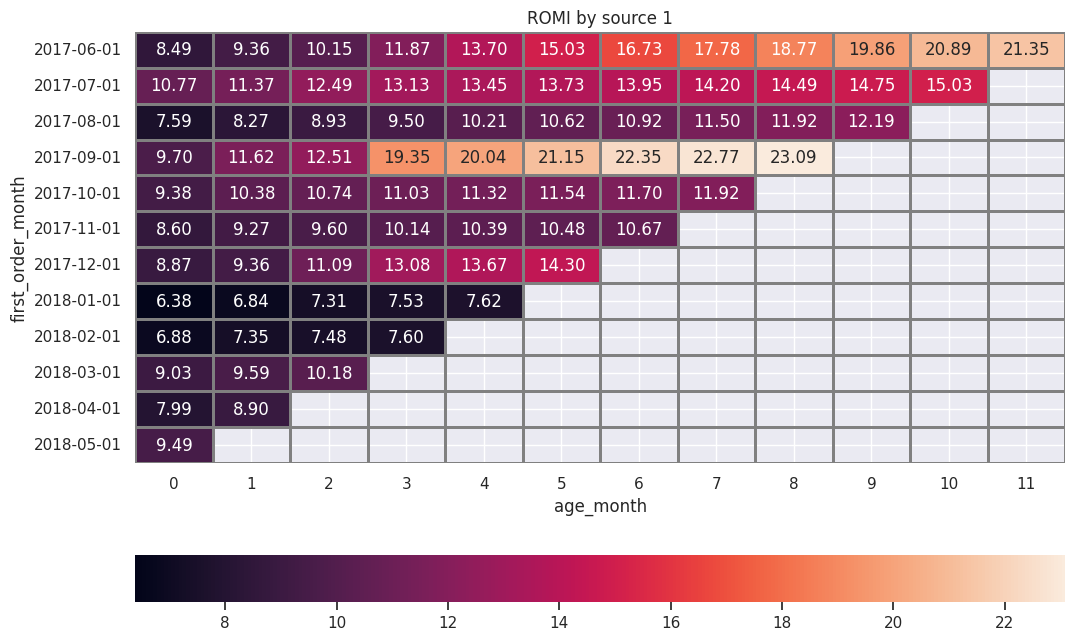

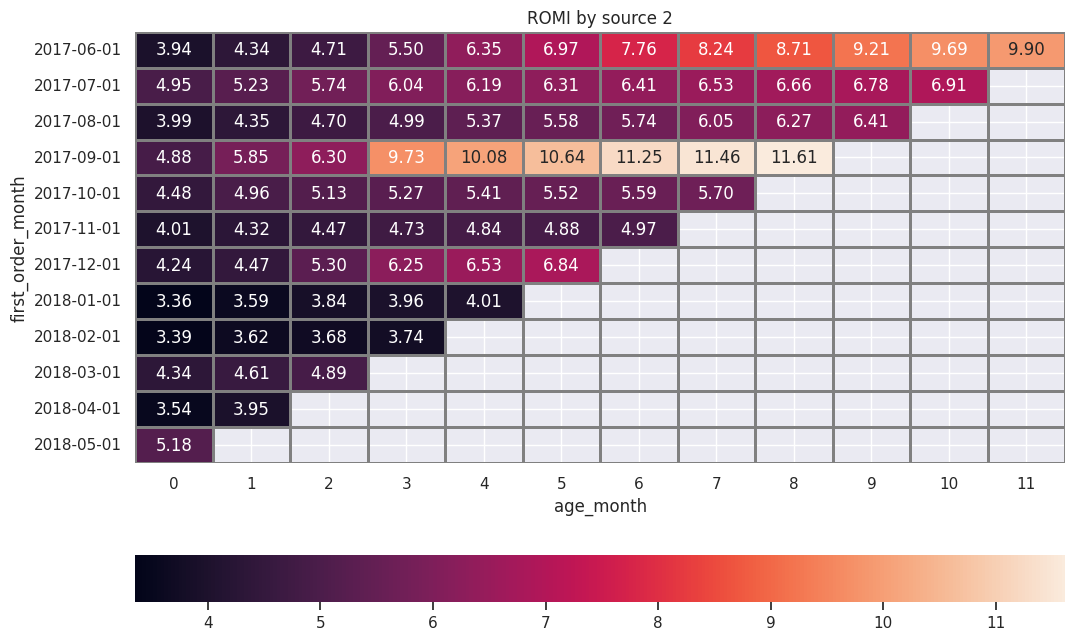

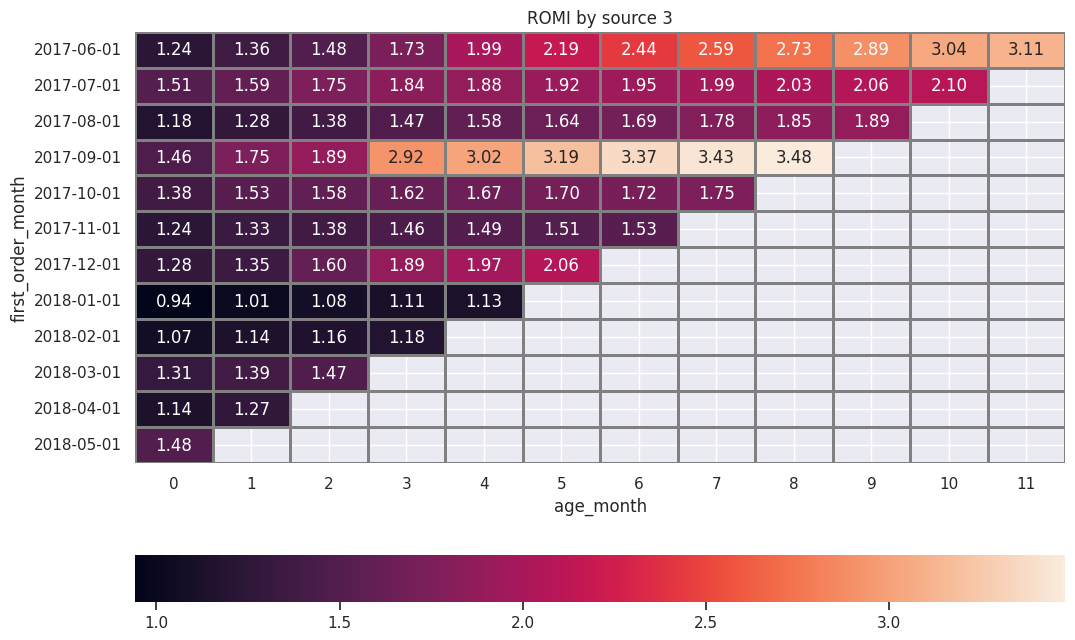

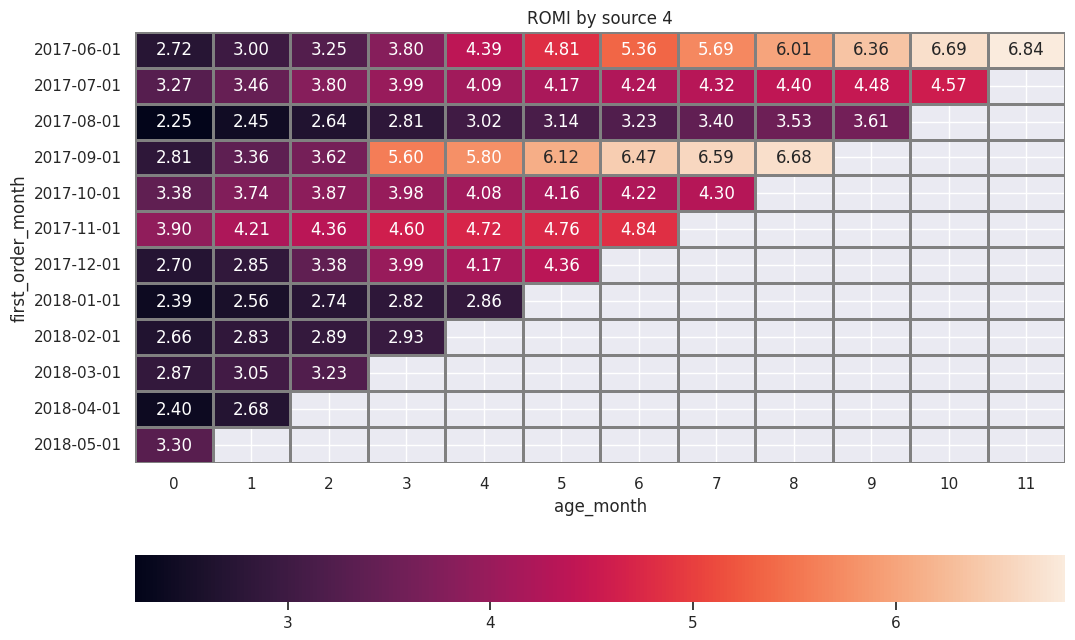

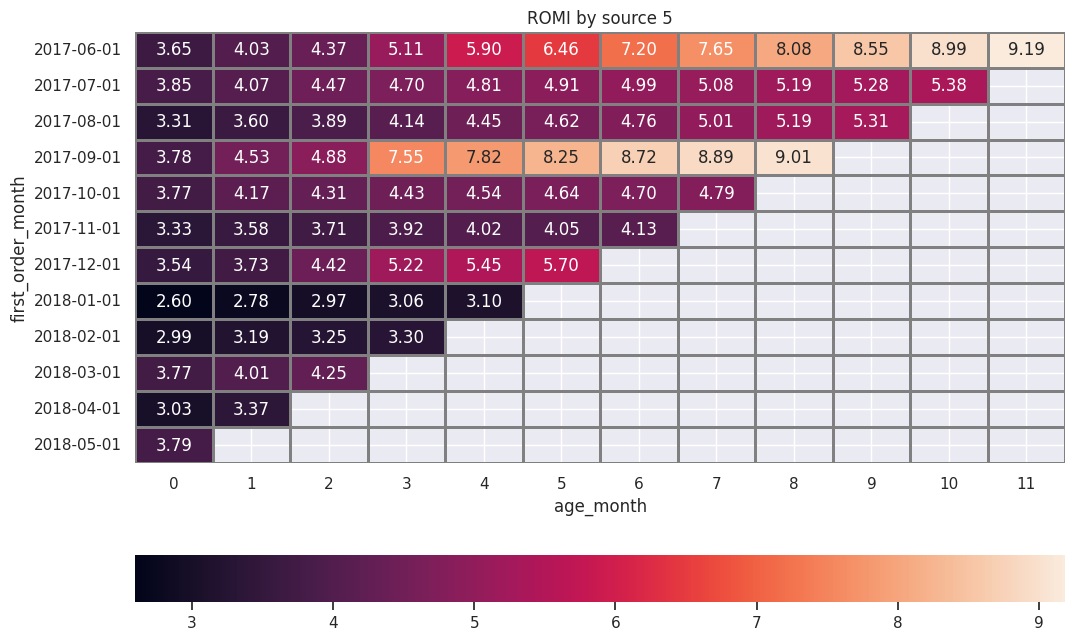

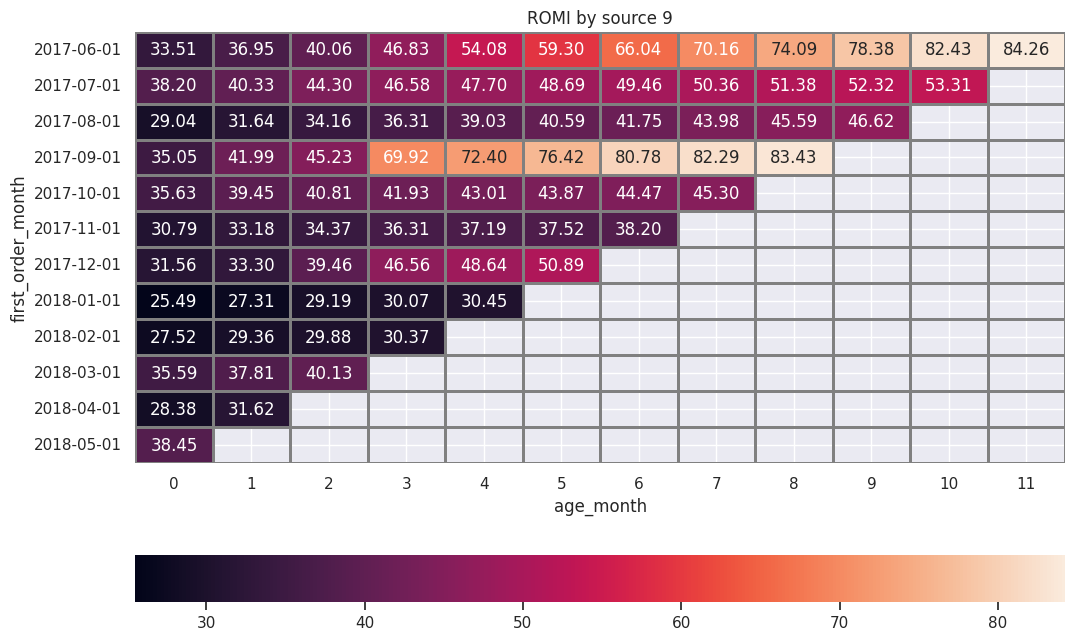

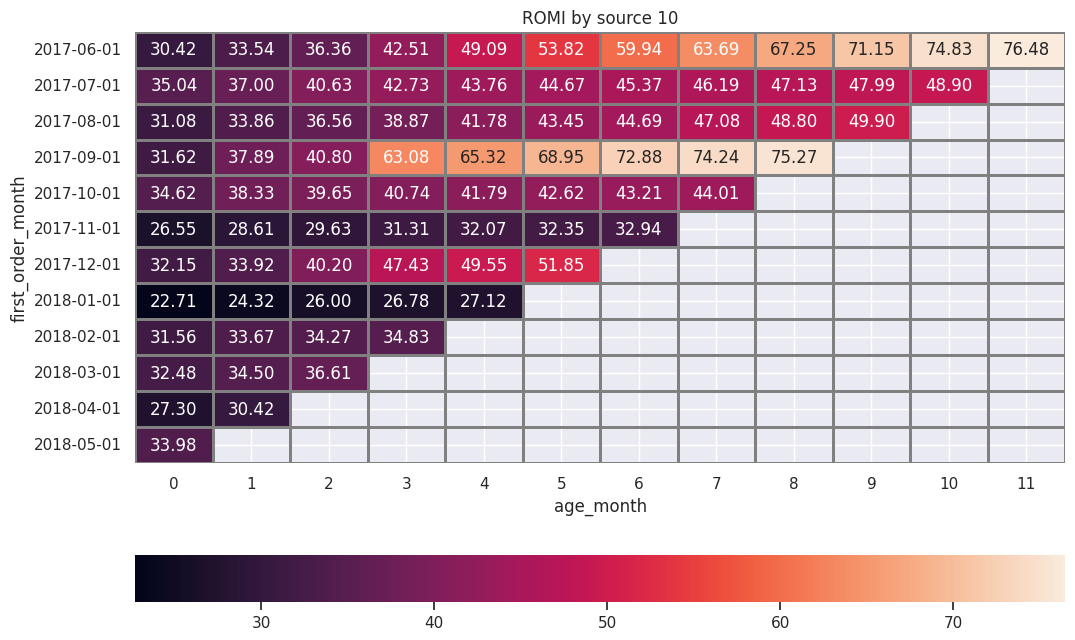

In [ ]:

# Generación de los reportes de ROMI por source_id (1,2,3,4,5,9,10 )
source_id_values = [1, 2, 3, 4, 5, 9, 10]
for source_id in source_id_values:
    generate_romi_report(source_id, orders_, costs)

### Conclusiones de la sección

En general, el ROMI tiende a aumentar con el tiempo para la mayoría de las cohortes. Esto indica que los retornos de las inversiones en marketing se acumulan favorablemente a medida que los clientes continúan comprando en meses posteriores a su primer pedido.
La cohorte de 2017-07-01 destaca por tener un incremento notable en su ROMI a lo largo del tiempo, especialmente entre los meses 9 y 10, donde el ROMI alcanza valores superiores a 100. Esto sugiere que las campañas de marketing en julio de 2017 fueron particularmente efectivas, resultando en clientes que generan altos retornos a lo largo del tiempo.Por otro lado, las cohortes más recientes, como 2018-04-01 y 2018-05-01, tienen valores iniciales de ROMI bajos, y la acumulación es menos visible debido a la falta de datos de meses posteriores. Es necesario esperar más tiempo para evaluar el rendimiento completo de estas cohortes.
Se recomienda analizar en detalle las estrategias de marketing implementadas en julio de 2017 y junio de 2017 para replicar los elementos clave que contribuyeron a su éxito en futuras campañas.

## Conclusiones generales


El análisis muestra un promedio diario de visitas de 907 y un promedio mensual de 23,228, con picos significativos en noviembre y diciembre, coincidiendo con las compras navideñas y estrategias de marketing efectivas. Agosto registra las visitas más bajas, probablemente debido a vacaciones y menor interés en compras online. La duración de sesiones revela un alto compromiso a corto plazo y retención a largo plazo, con un 97% de usuarios realizando una compra dentro de seis meses. Las cohortes iniciales muestran un crecimiento del LTV, estabilizándose después, y destacan las campañas de julio de 2017 por su alto ROMI. Se recomienda replicar estas estrategias exitosas y optimizar el embudo de conversión para mejorar la retención y el rendimiento a largo plazo.
